# Pip install


In [1]:
!pip install opencv-python
!pip install face_recognition

# Import

In [2]:
import face_recognition
import pandas as pd
import cv2
import numpy as np
import dlib
import random
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

**If the following line does not work use the attached FaceData.csv and collect the photos from the UTKFace In-The-Wild pictures. Put all these faces into an images folder. Then skip the next two lines. This should work as intended. The link to the UTKFaces is here https://susanqq.github.io/UTKFace/**

In [3]:
!git clone https://github.com/etoy22/Facial_Bias_Detector.git

fatal: destination path 'Facial_Bias_Detector' already exists and is not an empty directory.


In [53]:
%cd "Facial_Bias_Detector"

/content/Facial_Bias_Detector


#Database Imported

In [5]:
database = pd.read_csv("FaceData.csv")
database.head(15)

,File,Age,Gender,Ethnicity
0,100_0_0_20170112213500903.jpg,100,0,0
1,100_0_0_20170112215240346.jpg,100,0,0
2,100_1_0_20170112213001988.jpg,100,1,0
3,100_1_0_20170112213303693.jpg,100,1,0
4,100_1_0_20170112215032192.jpg,100,1,0
5,100_1_0_20170117195420803.jpg,100,1,0
6,100_1_0_20170119212053665.jpg,100,1,0
7,100_1_2_20170112213615815.jpg,100,1,2
8,100_1_2_20170112222336458.jpg,100,1,2
9,101_0_0_20170112213500903.jpg,101,0,0


In [6]:
%cd images/

/content/Facial_Bias_Detector/images


In [7]:
database['Encoding'] = pd.NaT

In [8]:
database.head(15)

,File,Age,Gender,Ethnicity,Encoding
0,100_0_0_20170112213500903.jpg,100,0,0,NaT
1,100_0_0_20170112215240346.jpg,100,0,0,NaT
2,100_1_0_20170112213001988.jpg,100,1,0,NaT
3,100_1_0_20170112213303693.jpg,100,1,0,NaT
4,100_1_0_20170112215032192.jpg,100,1,0,NaT
5,100_1_0_20170117195420803.jpg,100,1,0,NaT
6,100_1_0_20170119212053665.jpg,100,1,0,NaT
7,100_1_2_20170112213615815.jpg,100,1,2,NaT
8,100_1_2_20170112222336458.jpg,100,1,2,NaT
9,101_0_0_20170112213500903.jpg,101,0,0,NaT


#Functions

In [9]:
def encode(i):
  pic = cv2.imread(database.File[i])
  encoding = face_recognition.face_encodings(pic)
  if (encoding != []):
      embed.append(encoding[0])
      embed_details.append([database.File[i],database.Age[i],database.Gender[i],database.Ethnicity[i]])
      database.Encoding[i] = 0

#Get Encodings

*It is split up in this way so that individual parts of the collection of photos could be tested*

In [10]:
embed = []
embed_details = []
for i in range(1000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning

In [11]:
for i in range(1001,2000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
for i in range(2001,3000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
for i in range(3001,4000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
for i in range(4001,5000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
for i in range(5001,6000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
for i in range(6001,7000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
for i in range(7001,8000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
for i in range(8001,9000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
for i in range(9001,10000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
for i in range(10001,11000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
for i in range(11001,12000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
for i in range(12001,13000):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/lo

In [23]:
for i in range(13001,13970):
  encode(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning

This exists to remove us from the images folder so that if you want to download and look at the results of K-means it will not put the download in the images folder

In [ ]:
%cd ..

#K-Means Program

In [24]:
class k_means:
  def __init__ (self,k=3,max_iter=300,opt=0.001,max_dist=0):
    self.k = k
    self.opt = opt
    self.max_iter = max_iter
    self.max_dist = max_dist
    self.data = []
    self.info = []

  #the distance between the centroids and the point
  #the first return is the actual distance the second is which centroid
  #is the closest
  def distance(self, embed):
    dist = []
    for i in range(self.k):
      in_between = distance.euclidean(embed,self.k_points[i])
      dist.append(in_between)
    return min(dist), dist.index(min(dist))

  #selects a random point for the centroids to use as a starting place
  def select(self, amount):
    k_rand = []
    while len(k_rand) != self.k:
      temp = random.randrange(0,amount)
      if temp not in k_rand:
        k_rand.append(temp)
    # print(k_rand)
    for i in range (self.k):
      self.k_points.append(embed[k_rand[i]])

  #empties the groups
  def empty(self):
    self.group = []
    self.label = []
    self.leng = []
    self.group_info = []
    for i in range(self.k):
      self.group.append([])
      self.leng.append([])
      self.group_info.append([])

  def fit(self, data, info):
    self.data = data
    self.info = info
    self.k_points = []
    self.select(len(data))
    for max in range(self.max_iter):
      self.empty()
      for i in range(len(data)):
        l, labeled = self.distance(data[i])
        #Keeps track of the distance for data[i] for outlier detection
        self.leng[labeled].append(l)
        #keeps track that data[i] is in a specific group where 
        #label[i] is equivalent to data[i]]
        self.label.append(labeled)
        #Joins the data to the group
        self.group[labeled].append(data[i])
        #Joins the info for the data to the group
        self.group_info[labeled].append(info[i])

      
      
      #makes a copy of the current centroid to compare against the new one
      past_points = self.k_points.copy()

      #makes k_points empty to make new centroids
      self.k_points = []

      #makes the new k_points
      for j in range (self.k):
        self.k_points.append(np.average(self.group[j],axis=0))

      #saves it to current points
      current_points = self.k_points.copy()
      # print('Current Points:',current_points)

      #calculates optimization
      optimization_total = 0
      for l in range(self.k):
        optimization_total += distance.euclidean(past_points[l],current_points[l])

      #Checks if optimizatation reaches the right level
      if (optimization_total < self.opt):
        break; 
    
    #checks if needs for removal via outliers
    if (self.max_dist > 0):
      self.remove_clust()

  #Gives the amount in each group
  def fit_catelog(self):
    catelog_fit = []
    for i in range(self.k):
      catelog_fit.append(self.label.count(i))
    if (self.max_dist > 0):
      catelog_fit.append(self.label.count(self.k))
    return catelog_fit
  
  #if there is a maximum distance removes all points from 
  #there clusters that are deemed to far
  def remove_clust(self):
    updated_list = []
    updated_label = []
    outlier = []
    for i in range(self.k+1): 
      #Makes it so that self.group[k] becomes the outlier group
      updated_list.append([])
    for i in range (self.k):
      for j in range(len(self.leng[i])):
        if (self.max_dist > self.leng[i][j]):
          updated_list[i].append(self.group[i][j])
          updated_label.append(i)
        else:
          updated_list[self.k].append(self.group[i][j])
          outlier.append(self.k)
    self.group = updated_list
    updated_label += outlier
    self.label = updated_label
  
  def get_max_dist(self):
    return self.max_dist

  def get_label(self):
    return self.label

  def get_k(self):
    if(self.max_dist>0):
      return self.k+1
    return self.k

  def get_data(self):
    return self.data
  
  def get_info(self):
    return self.info

  def get_k_points(self):
    return self.k_points

  def get_group(self, i):
    return self.group[i]

  def get_all_group(self):
    listings = []
    points = []
    for i in range(self.get_k()):
      listings+= self.group[i]
      points += (np.tile(i,len(self.group[i]))).tolist()
    return points, listings


# Looking at K

*K = 4*

In [47]:
k4 = k_means(4)
k4.fit(embed, embed_details)

In [48]:
k4data = pd.DataFrame(k4.get_info())
k4data.columns = ['File','Age','Gender','Ethnicity']
k4data['Label'] = k4.get_label()
k4data.head(20)

,File,Age,Gender,Ethnicity,Label
0,100_0_0_20170112213500903.jpg,100,0,0,0
1,100_0_0_20170112215240346.jpg,100,0,0,0
2,100_1_0_20170112213001988.jpg,100,1,0,2
3,100_1_0_20170112213303693.jpg,100,1,0,2
4,100_1_0_20170112215032192.jpg,100,1,0,2
5,100_1_0_20170117195420803.jpg,100,1,0,2
6,100_1_0_20170119212053665.jpg,100,1,0,2
7,100_1_2_20170112213615815.jpg,100,1,2,0
8,100_1_2_20170112222336458.jpg,100,1,2,0
9,101_0_0_20170112213500903.jpg,101,0,0,0


In [49]:
x4 = k4.get_data()
y4 = k4.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x4)
x4_show = principalComponents[:,0]
y4_show = principalComponents[:,1]
k4data['X'] = principalComponents[:,0]
k4data['Y'] = principalComponents[:,1]

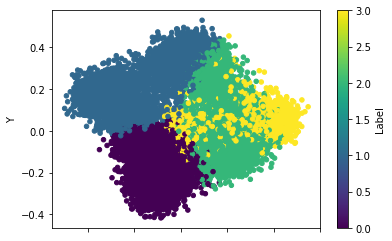

In [50]:
k4data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

To download the results in a csv file run the follwing code

In [51]:
k4data.to_csv("kmeans-4data.csv",index=False)

*K = 15* 

In [ ]:
k15 = k_means(15)
k15.fit(embed, embed_details)

In [ ]:
k15data = pd.DataFrame(k15.get_info())
k15data.columns = ['File','Age','Gender','Ethnicity']
k15data['Label'] = k15.get_label()
k15data.head(20)

In [ ]:
x15 = k15.get_data()
y15 = k15.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x15)
x15_show = principalComponents[:,0]
y15_show = principalComponents[:,1]
k15data['X'] = principalComponents[:,0]
k15data['Y'] = principalComponents[:,1]

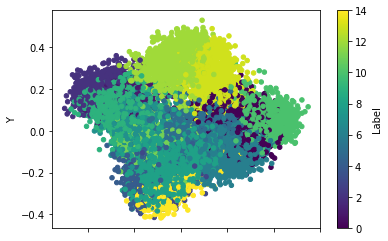

In [61]:
k15data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

The following three diagrams are pictures of the Ethnicity, Age and Gender break down. While these exist in the K = 15 these result will be seen no matter which K value you are testing. This is because it doesn't actually use the K value. 

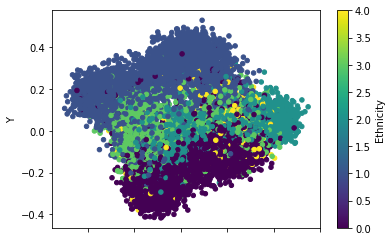

In [62]:
k15data.plot.scatter(x='X',y='Y',c='Ethnicity',colormap='viridis')

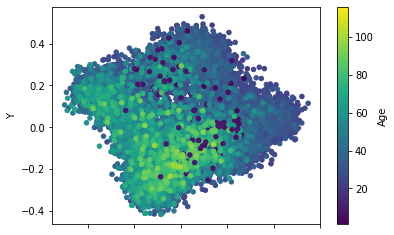

In [64]:
k15data.plot.scatter(x='X',y='Y',c='Age',colormap='viridis')

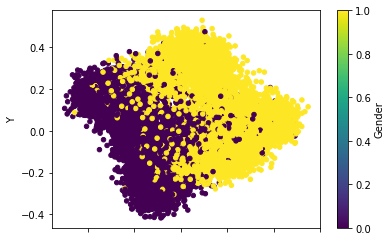

In [52]:
k15data.plot.scatter(x='X',y='Y',c='Gender',colormap='viridis')

To download the results in a csv file run the follwing code

In [ ]:
k15data.to_csv("kmeans-15data.csv",index=False)

*K = 25*

In [ ]:
k25 = k_means(25)
k25.fit(embed, embed_details)

In [ ]:
k25data = pd.DataFrame(k25.get_info())
k25data.columns = ['File','Age','Gender','Ethnicity']
k25data['Label'] = k25.get_label()
k25data.head(20)

In [ ]:
x25 = k25.get_data()
y25 = k25.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x25)
x25_show = principalComponents[:,0]
y25_show = principalComponents[:,1]
k25data['X'] = principalComponents[:,0]
k25data['Y'] = principalComponents[:,1]

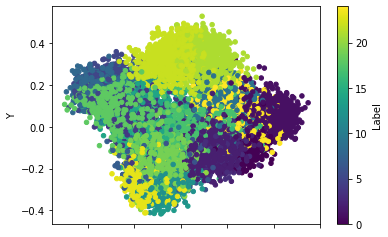

In [59]:
k25data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

To download the results in a csv file run the follwing code

In [ ]:
k25data.to_csv("kmeans-25data.csv",index=False)

*K = 50*

In [25]:
k50 = k_means(50)
k50.fit(embed, embed_details)

In [26]:
k50data = pd.DataFrame(k50.get_info())
k50data.columns = ['File','Age','Gender','Ethnicity']
k50data['Label'] = k50.get_label()
k50data.head(20)

,File,Age,Gender,Ethnicity,Label
0,100_0_0_20170112213500903.jpg,100,0,0,11
1,100_0_0_20170112215240346.jpg,100,0,0,48
2,100_1_0_20170112213001988.jpg,100,1,0,18
3,100_1_0_20170112213303693.jpg,100,1,0,18
4,100_1_0_20170112215032192.jpg,100,1,0,18
5,100_1_0_20170117195420803.jpg,100,1,0,18
6,100_1_0_20170119212053665.jpg,100,1,0,18
7,100_1_2_20170112213615815.jpg,100,1,2,12
8,100_1_2_20170112222336458.jpg,100,1,2,12
9,101_0_0_20170112213500903.jpg,101,0,0,12


In [27]:
x50 = k50.get_data()
y50 = k50.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x50)
x50_show = principalComponents[:,0]
y50_show = principalComponents[:,1]
k50data['X'] = principalComponents[:,0]
k50data['Y'] = principalComponents[:,1]

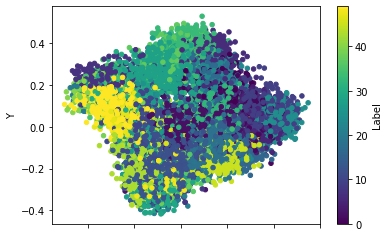

In [29]:
k50data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

To download the results in a csv file run the follwing code

In [46]:
k50data.to_csv("kmeans-50data.csv",index=False)

*K = 100*

In [31]:
k100 = k_means(100)
k100.fit(embed, embed_details)

In [32]:
k100data = pd.DataFrame(k100.get_info())
k100data.columns = ['File','Age','Gender','Ethnicity']
k100data['Label'] = k100.get_label()
k100data.head(20)

,File,Age,Gender,Ethnicity,Label
0,100_0_0_20170112213500903.jpg,100,0,0,85
1,100_0_0_20170112215240346.jpg,100,0,0,72
2,100_1_0_20170112213001988.jpg,100,1,0,35
3,100_1_0_20170112213303693.jpg,100,1,0,35
4,100_1_0_20170112215032192.jpg,100,1,0,35
5,100_1_0_20170117195420803.jpg,100,1,0,35
6,100_1_0_20170119212053665.jpg,100,1,0,35
7,100_1_2_20170112213615815.jpg,100,1,2,35
8,100_1_2_20170112222336458.jpg,100,1,2,72
9,101_0_0_20170112213500903.jpg,101,0,0,14


In [33]:
x100 = k100.get_data()
y100 = k100.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x100)
x100_show = principalComponents[:,0]
y100_show = principalComponents[:,1]
k100data['X'] = principalComponents[:,0]
k100data['Y'] = principalComponents[:,1]

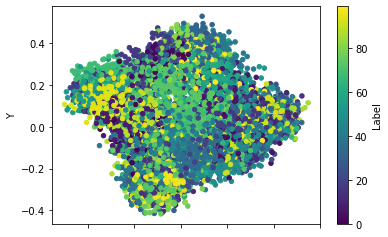

In [37]:
k100data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

To download the results in a csv file run the follwing code

In [45]:
k100data.to_csv("kmeans-100data.csv",index=False)

*K = 200*

In [ ]:
k200 = k_means(200)
k200.fit(embed, embed_details)

In [ ]:
k200data = pd.DataFrame(k200.get_info())
k200data.columns = ['File','Age','Gender','Ethnicity']
k200data['Label'] = k200.get_label()
k200data.head(20)

In [ ]:
x200 = k200.get_data()
y200 = k200.get_label()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x200)
x200_show = principalComponents[:,0]
y200_show = principalComponents[:,1]
k200data['X'] = principalComponents[:,0]
k200data['Y'] = principalComponents[:,1]

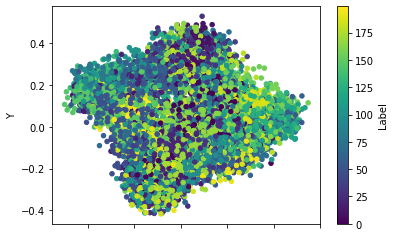

In [66]:
k200data.plot.scatter(x='X',y='Y',c='Label',colormap='viridis')

To download the results in a csv file run the follwing code

In [ ]:
kdata200.to_csv("kmeans-200data.csv",index=False)